<h1>DBSCAN Clustering</h1>

Não supervisionado

O DBSCAN (Density-Based Spatial Clustering of Applications with Noise) é um algoritmo de clustering baseado em densidade. Ao contrário do K-means, ele não exige definir o número de clusters (k) e pode identificar formas arbitrárias de agrupamentos, além de detectar outliers (ruído).

<h3>🎯 O que é e qual o objetivo?</h3>
O objetivo do DBSCAN é encontrar áreas densas de pontos e separá-las de regiões esparsas (consideradas ruído). Ele agrupa pontos que estão a uma distância menor que um certo valor (eps) e que tenham um número mínimo de vizinhos (min_samples).

<h4>🧠 Conceitos-chave</h4>
<ul>
    <li>Ponto central (core point): tem ao menos min_samples vizinhos dentro de eps.</li>
    <li>Ponto de borda: está dentro de eps de um ponto central, mas não é core.</li>
    <li>Ruído: ponto que não é core nem está próximo de um core.</li>
</ul>

<h3>✅ Pré-requisitos</h3>
<ul>
    <li>Dados numéricos com uma noção de distância (geralmente Euclidiana).</li>
    <li>Definir dois parâmetros:
        <ul>
            <li>eps: raio de vizinhança.</li>
            <li>min_samples: número mínimo de pontos para formar um cluster.</li>
        </ul>
    </li>
</ul>

<h3>✅ Vantagens</h3>
<ul>
    <li>Não precisa definir o número de clusters.</li>
    <li>Identifica clusters de forma arbitrária.</li>
    <li>Detecta outliers automaticamente.</li>
    <li>Robusto a ruído e clusters com tamanhos diferentes.</li>
</ul>

<h3>❌ Desvantagens</h3>
<ul>
    <li>Escolha sensível de eps e min_samples.</li>
    <li>Não funciona bem em dados com densidades variáveis.</li>
    <li>Mais lento em grandes volumes de dados com alta dimensionalidade.</li>
</ul>

<h3>💼 Aplicações comuns</h3>
<ul>
    <li>🌐 Geoespacial
        <ul>
            <li>Agrupamento de locais geográficos (ex: zonas de crime, pontos de venda).</li>
        </ul>
    </li>   
    <li>📊 Análise de dados
        <ul>
            <li>Detecção de anomalias e outliers em dados financeiros ou de rede.</li>
            <li>Agrupamento de comportamento de clientes em ambientes complexos.</li>
        </ul>
    </li>   
    <li>🧠 Visão computacional
        <ul>
            <li>Agrupamento de pixels em imagens sem necessidade de formas regulares.</li>
        </ul>
    </li>   
</ul>

<h2>Iniciando o ambiente</h2>

In [57]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

import sklearn
from sklearn.cluster import DBSCAN

from collections import Counter


In [20]:

rcParams['figure.figsize']= 5, 4
sb.set_style('whitegrid')


<h2>DBScan clustering para identificação de outliers</h2>

<h3>Carregando dataset de iris.data</h3>

In [38]:
df = pd.read_csv('iris.data.csv')
df.columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width', 'Species']
df.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,4.9,3.0,1.4,0.2,setosa
1,4.7,3.2,1.3,0.2,setosa
2,4.6,3.1,1.5,0.2,setosa
3,5.0,3.6,1.4,0.2,setosa
4,5.4,3.9,1.7,0.4,setosa


In [34]:

data = df[['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']].values
data[:5]

array([[4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4]])

In [36]:
target = df['Species'].values
target[:5]


array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa'], dtype=object)

<h3>Criando e treinando o modelo</h3>

In [50]:
model = DBSCAN(eps=0.8, min_samples=19).fit(data)


<h3>Visualizando o resultado</h3>

In [63]:
print(Counter(model.labels_))

df_outliers = pd.DataFrame(data)
print(df_outliers[model.labels_ == -1])

Counter({1: 94, 0: 49, -1: 6})
       0    1    2    3
97   5.1  2.5  3.0  1.1
104  7.6  3.0  6.6  2.1
116  7.7  3.8  6.7  2.2
117  7.7  2.6  6.9  2.3
121  7.7  2.8  6.7  2.0
130  7.9  3.8  6.4  2.0


Text(0.5, 1.0, 'DBSCAN clustering for outlier detection')

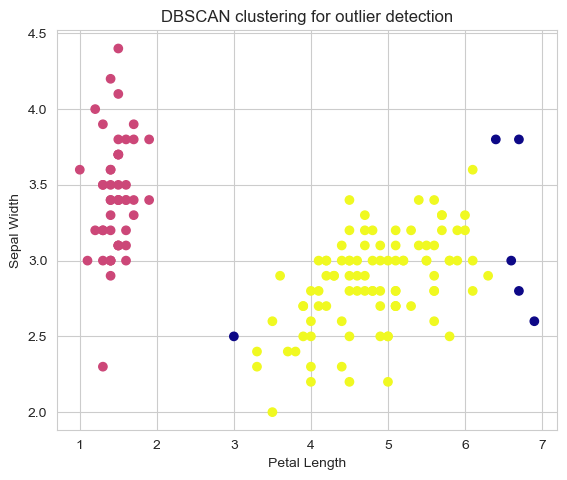

In [100]:
fig=plt.figure()
ax = fig.add_axes([.1,.1,1,1])

labels = model.labels_

ax.scatter(data[:,2], data[:,1], c=labels, cmap='plasma')
ax.set_xlabel('Petal Length')
ax.set_ylabel('Sepal Width')
plt.title('DBSCAN clustering for outlier detection')

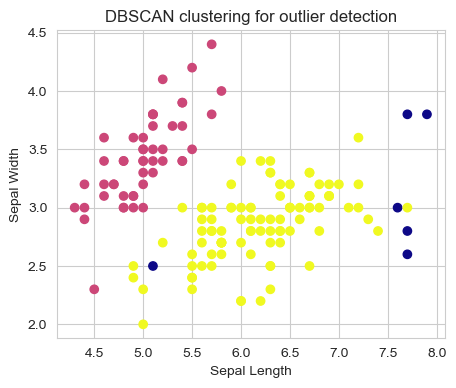

In [119]:

plt.scatter(data[:, 0],data[:, 1], c=labels, cmap='plasma')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('DBSCAN clustering for outlier detection')
plt.show()